# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ALGO1-:-Introduction-à-l'algorithmique" data-toc-modified-id="ALGO1-:-Introduction-à-l'algorithmique-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://perso.crans.org/besson/teach/info1_algo1_2019/" target="_blank">ALGO1 : Introduction à l'algorithmique</a></a></div><div class="lev1 toc-item"><a href="#Cours-Magistral-6" data-toc-modified-id="Cours-Magistral-6-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cours Magistral 6</a></div><div class="lev2 toc-item"><a href="#Rendu-de-monnaie" data-toc-modified-id="Rendu-de-monnaie-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Rendu de monnaie</a></div><div class="lev2 toc-item"><a href="#Structure-&quot;Union-Find&quot;" data-toc-modified-id="Structure-&quot;Union-Find&quot;-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Structure "Union-Find"</a></div><div class="lev3 toc-item"><a href="#Naïve" data-toc-modified-id="Naïve-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Naïve</a></div><div class="lev3 toc-item"><a href="#Avec-compression-de-chemin" data-toc-modified-id="Avec-compression-de-chemin-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Avec compression de chemin</a></div><div class="lev2 toc-item"><a href="#Algorithme-de-Kruskal" data-toc-modified-id="Algorithme-de-Kruskal-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Algorithme de Kruskal</a></div><div class="lev2 toc-item"><a href="#Algorithme-de-Prim" data-toc-modified-id="Algorithme-de-Prim-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Algorithme de Prim</a></div><div class="lev3 toc-item"><a href="#File-de-priorité-min" data-toc-modified-id="File-de-priorité-min-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>File de priorité min</a></div><div class="lev3 toc-item"><a href="#Prim" data-toc-modified-id="Prim-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Prim</a></div><div class="lev2 toc-item"><a href="#Illustrations" data-toc-modified-id="Illustrations-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Illustrations</a></div><div class="lev2 toc-item"><a href="#Autres" data-toc-modified-id="Autres-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Autres</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Conclusion</a></div>

# [ALGO1 : Introduction à l'algorithmique](https://perso.crans.org/besson/teach/info1_algo1_2019/)

- [Page du cours](https://perso.crans.org/besson/teach/info1_algo1_2019/) : https://perso.crans.org/besson/teach/info1_algo1_2019/
- Magistère d'Informatique de Rennes - ENS Rennes - Année 2019/2020
- Intervenants :
  + Cours : [Lilian Besson](https://perso.crans.org/besson/)
  + Travaux dirigés : [Raphaël Truffet](http://perso.eleves.ens-rennes.fr/people/Raphael.Truffet/)
- Références :
  + [Open Data Structures](http://opendatastructures.org/ods-python.pdf)

# Cours Magistral 6

- Ce cours traite des algorithmes gloutons.
- Ce notebook sera concis, comparé aux précédents.

## Rendu de monnaie

- Voir https://en.wikipedia.org/wiki/Change-making_problem ou https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_rendu_de_monnaie

In [27]:
def binary_coin_change(x, R):
    """Coin change

    :param x: table of non negative values
    :param R: target value
    :returns bool: True if there is a non negative linear combination
    of x that has value R
    :complexity: O(n*R)
    """
    if int(R) != R:  # we work with 1/100
        R = int(R * 100)
        x = [int(xi * 100) for xi in x]
    b = [False] * (R + 1)
    b[0] = True
    for xi in x:
        for s in range(xi, R + 1):
            b[s] |= b[s - xi]
    return b[R]

In [37]:
def constructive_coin_change(values_of_coins, sum_to_find):
    """Coin change

    :param values_of_coins: table of non negative values
    :param sum_to_find: target value
    :returns bool: True if there is a non negative linear combination
    of x that has value R
    :complexity: O(n*R)
    """
    with_cents = False
    if int(sum_to_find) != sum_to_find:  # we work with 1/100
        with_cents = True
        sum_to_find = int(sum_to_find * 100)
        values_of_coins = [int(pi * 100) for pi in values_of_coins]
    n = len(values_of_coins)
    number_of_coins = [0] * n
    values_of_coins = sorted(values_of_coins, reverse=True)
    current_sum = sum_to_find
    for i, pi in enumerate(values_of_coins):
        assert pi > 0, "Error: a coin with value zero."
        if pi > current_sum:
            continue  # coin is too large, we continue
        how_much_pi, rest = divmod(current_sum, pi)  # x // y, x % y
        number_of_coins[i] = how_much_pi
        print("For current sum = {}, coin = {}, was used {} times, now sum = {}.".format(current_sum, pi, how_much_pi, rest))
        current_sum = rest
    if current_sum != 0:
        raise ValueError("Could not write {} in the coin system {} with greedy method.".format(sum_to_find, values_of_coins))
    if with_cents:
        values_of_coins = [round(pi / 100, 2) for pi  in values_of_coins]
    return number_of_coins, values_of_coins

Avec les pièces des euros :

In [39]:
billets = [500, 200, 100, 50, 20, 10, 5]
pieces = [2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
euros = billets + pieces

binary_coin_change(euros, 16.12)
constructive_coin_change(euros, 16.12)

True

For current sum = 1612, coin = 1000, was used 1 times, now sum = 612.
For current sum = 612, coin = 500, was used 1 times, now sum = 112.
For current sum = 112, coin = 100, was used 1 times, now sum = 12.
For current sum = 12, coin = 10, was used 1 times, now sum = 2.
For current sum = 2, coin = 2, was used 1 times, now sum = 0.


([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
 [500.0,
  200.0,
  100.0,
  50.0,
  20.0,
  10.0,
  5.0,
  2.0,
  1.0,
  0.5,
  0.2,
  0.1,
  0.05,
  0.02,
  0.01])

In [41]:
billets = [500, 200, 100, 50, 20, 10, 5]

binary_coin_change(billets, 16)
constructive_coin_change(billets, 16)

False

For current sum = 16, coin = 10, was used 1 times, now sum = 6.
For current sum = 6, coin = 5, was used 1 times, now sum = 1.


ValueError: Couldnot write 16 in the coin system [500, 200, 100, 50, 20, 10, 5] with greedy method.

Avec un autre système de pièce :

In [ ]:
billets = [19, 13, 7]
pieces = [3, 2]
weird = billets + pieces

if binary_coin_change(weird, 47):
    constructive_coin_change(weird, 47)
if binary_coin_change(weird, 49):
    constructive_coin_change(weird, 49)
if binary_coin_change(weird, 50):
    constructive_coin_change(weird, 50)

For current sum = 47, coin = 19, was used 2 times, now sum = 9.
For current sum = 9, coin = 7, was used 1 times, now sum = 2.
For current sum = 2, coin = 2, was used 1 times, now sum = 0.


([2, 0, 1, 0, 1], [19, 13, 7, 3, 2])

For current sum = 49, coin = 19, was used 2 times, now sum = 11.
For current sum = 11, coin = 7, was used 1 times, now sum = 4.
For current sum = 4, coin = 3, was used 1 times, now sum = 1.


ValueError: Couldnot write 49 in the coin system [19, 13, 7, 3, 2] with greedy method.

Cette méthode gourmande ne marche pas pour tous les systèmes !

---
## Structure "Union-Find"

### Naïve

In [49]:
class UnionFind:
    """Maintains a partition of {0, ..., n-1}
    """
    def __init__(self, n):
        self.up_bound = list(range(n))

    def find(self, x_index):
        """
        :returns: identifier of part containing x_index
        :complex_indexity: O(n) worst case, O(log n) in amortized cost.
        """
        if self.up_bound[x_index] == x_index:
            return x_index
        self.up_bound[x_index] = self.find(self.up_bound[x_index])
        return self.up_bound[x_index]

    def union(self, x_index, y_index):
        """
        Merges part that contain x and part containing y
        :returns: False if x_index, y_index are already in same part
        :complexity: O(n) worst case, O(log n) in amortized cost.
        """
        repr_x = self.find(x_index)
        repr_y = self.find(y_index)
        if repr_x == repr_y:       # already in the same component
            return False
        self.up_bound[repr_x] = repr_y
        return True

Par exemple avec $S = \{0,1,2,3,4\}$ et les unions suivantes :

In [50]:
S = [0,1,2,3,4]
U = UnionFind(len(S))

In [51]:
U.up_bound
U.union(0, 2)
U.up_bound

[0, 1, 2, 3, 4]

True

[2, 1, 2, 3, 4]

In [52]:
U.up_bound
U.union(2, 3)
U.up_bound

[2, 1, 2, 3, 4]

True

[2, 1, 3, 3, 4]

In [53]:
for i in S:
    U.find(i)

3

1

3

3

4

Cela représente la partition $\{ \{0,2,3\}, \{1\}, \{4\}\}$.

### Avec compression de chemin

In [54]:
class UnionFind_CompressedPaths:
    """Maintains a partition of {0, ..., n-1}
    """
    def __init__(self, n):
        self.up_bound = list(range(n))
        self.rank = [0] * n

    def find(self, x_index):
        """
        :returns: identifier of part containing x_index
        :complex_indexity: O(inverse_ackerman(n))
        """
        if self.up_bound[x_index] == x_index:
            return x_index
        self.up_bound[x_index] = self.find(self.up_bound[x_index])
        return self.up_bound[x_index]

    def union(self, x_index, y_index):
        """
        Merges part that contain x and part containing y
        :returns: False if x_index, y_index are already in same part
        :complexity: O(inverse_ackerman(n))
        """
        repr_x = self.find(x_index)
        repr_y = self.find(y_index)
        if repr_x == repr_y:       # already in the same component
            return False
        if self.rank[repr_x] == self.rank[repr_y]:
            self.rank[repr_x] += 1
            self.up_bound[repr_y] = repr_x
        elif self.rank[repr_x] > self.rank[repr_y]:
            self.up_bound[repr_y] = repr_x
        else:
            self.up_bound[repr_x] = repr_y
        return True

Par exemple avec $S = \{0,1,2,3,4\}$ et les unions suivantes :

In [55]:
S = [0,1,2,3,4]
U = UnionFind_CompressedPaths(len(S))

In [56]:
U.up_bound
U.union(0, 2)
U.up_bound

[0, 1, 2, 3, 4]

True

[0, 1, 0, 3, 4]

In [57]:
U.up_bound
U.union(2, 3)
U.up_bound

[0, 1, 0, 3, 4]

True

[0, 1, 0, 0, 4]

In [58]:
for i in S:
    U.find(i)

0

1

0

0

4

Cela représente la partition $\{ \{0,2,3\}, \{1\}, \{4\}\}$.

---
## Algorithme de Kruskal

On utilise une des implémentations de la structure Union-Find, et le reste du code est très simple.

In [59]:
def kruskal(graph, weight):
    """Minimum spanning tree by Kruskal

    :param graph: undirected graph in listlist or listdict format
    :param weight: in matrix format or same listdict graph
    :returns: list of edges of the tree
    :complexity: ``O(|E|log|E|)``
    """
    # a UnionFind with n singletons { {0}, {1}, ..., {n-1} }
    u_f = UnionFind(len(graph))
    edges = [ ]
    for u, _ in enumerate(graph):
        for v in graph[u]:
            # we add the edge (u, v) with weight w(u,v)
            edges.append((weight[u][v], u, v))
    edges.sort()  # sort the edge in increasing order!
    min_span_tree = [ ]
    for w_idx, u_idx, v_idx in edges:  # O(|E|)
        if u_f.union(u_idx, v_idx):
            # u and v were not in the same connected component
            min_span_tree.append((u_idx, v_idx))
            # we add the edge (u, v) in the tree, now they are in the same connected component
    return min_span_tree

---
## Algorithme de Prim

### File de priorité min
On peut utiliser les opérations `heappush` et `heappop` du module `heapq`.
Ou notre implémentation maison des tas, qui permet d'avoir une opération `update` pour efficacement mettre à jour la priorité d'un élément.

In [60]:
from heapq import heappop, heappush

In [61]:
from heap_operations import OurHeap

### Prim

In [97]:
def prim(graph, weight, source=0):
    """Minimum spanning tree by Prim

    - param graph: directed graph, connex and non-oriented
    - param weight: in matrix format or same listdict graph
    - assumes: weights are non-negative

    - param source: source vertex
    - returns: distance table, precedence table

    - complexity: O(|S| + |A| log|A|)
    """
    n = len(graph)
    assert all(weight[u][v] >= 0 for u in range(n) for v in graph[u])
    prec = [None] * n
    cost = [float('inf')] * n
    cost[source] = 0
    # the difference with Dijsktra is that the heap starts with all the nodes!
    heap = OurHeap([])
    is_in_the_heap = [False for u in range(n)]
    for u in range(n):
        heap.push((cost[u], u))
        is_in_the_heap[u] = True
    while heap:
        dist_node, node = heap.pop()       # Closest node from source
        is_in_the_heap[node] = False
        # and there is no color white/gray/black
        # the node is always visited!
        for neighbor in graph[node]:
            if is_in_the_heap[neighbor] and cost[neighbor] >= weight[node][neighbor]:
                old_cost = cost[neighbor]
                cost[neighbor] = weight[node][neighbor]
                prec[neighbor] = node
                heap.update((old_cost, neighbor), (cost[neighbor], neighbor))
    # now we need to construct the min_spanning_tree
    edges = [ ]
    for u in range(n):
        if u != prec[u]:
            edges.append((u, prec[u]))
    return edges  # cost, prec

---
## Illustrations

In [88]:
import random
import math

In [89]:
def dist(a, b):
    """
    distance between point a and point b
    """
    return math.sqrt(sum([(a[i] - b[i]) * (a[i] - b[i]) for i in range(len(a))]))

In [90]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.1)

In [91]:
N = 50
points = [[random.random() * 5, random.random() * 5] for _ in range(N)]
weight = [[dist(points[i], points[j]) for j in range(N)]
          for i in range(N)]
graph = [[j for j in range(N) if i != j] for i in range(N)]

In [92]:
min_span_tree_kruskal = kruskal(graph, weight)

In [98]:
min_span_tree_prim = prim(graph, weight)

<Figure size 1200x840 with 0 Axes>

Text(0.5, 1.0, 'The whole graph')

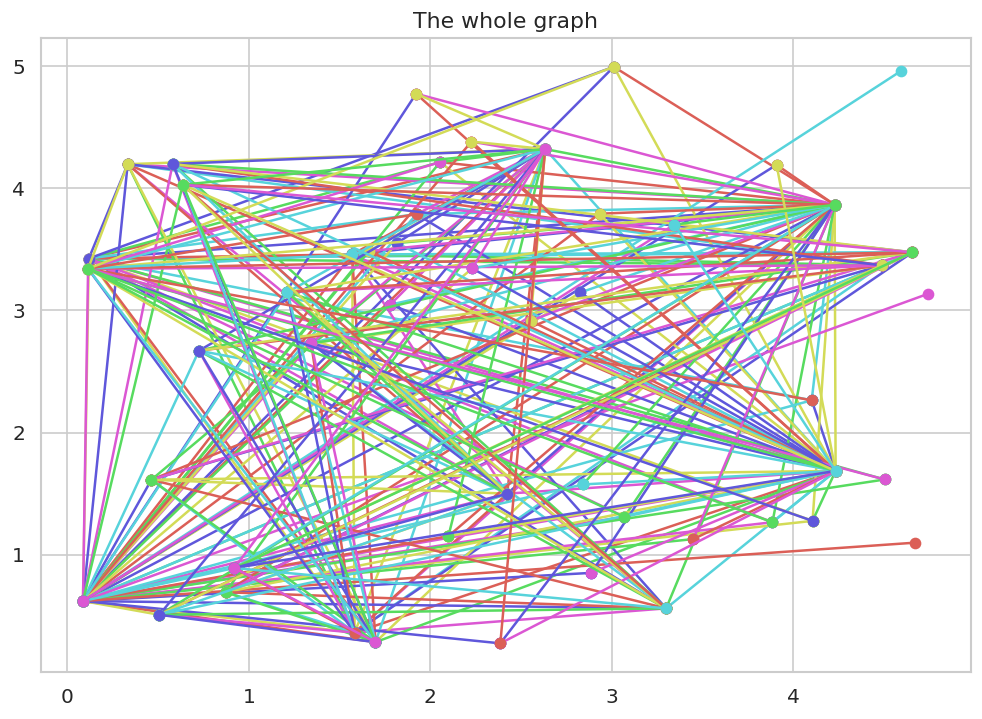

In [94]:
plt.figure()
for u in points:
    for v in points:
        if u > v: break
        xu, yu = u
        xv, yv = v
        _ = plt.plot([xu, xv], [yu, yv], 'o-')
        # print("{} -- {}".format(points[u_idx], points[v_idx]))
plt.title("The whole graph")
plt.show()

<Figure size 1200x840 with 0 Axes>

23.37978298568072


Text(0.5, 1.0, 'Minimum spanning with Kruskal tree of cost 23.38')

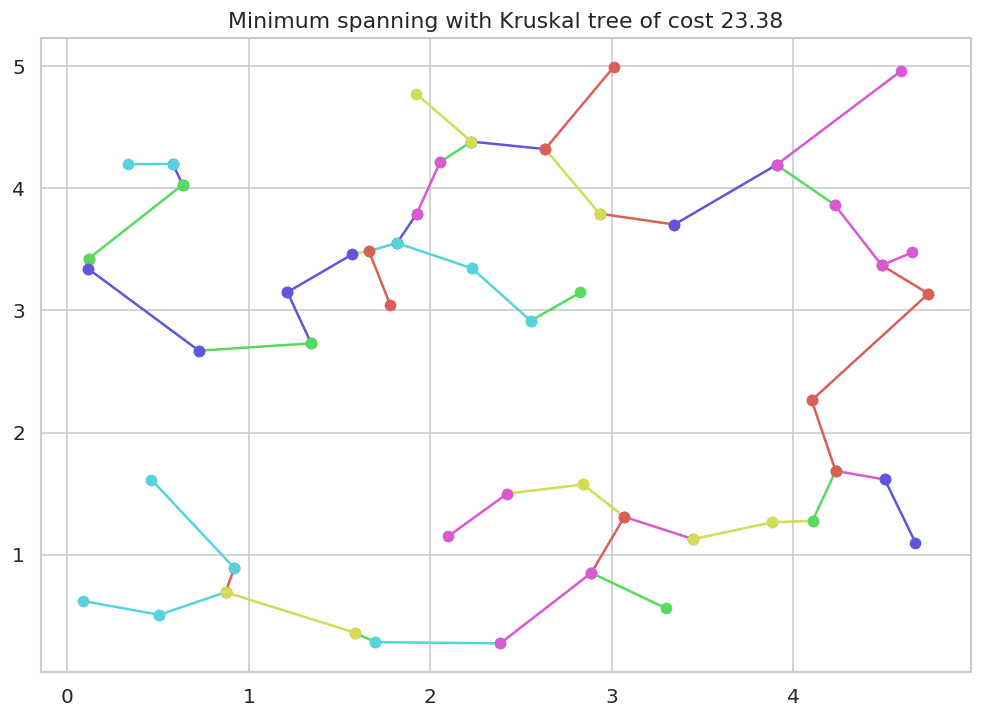

In [95]:
plt.figure()
val = 0
for u_idx, v_idx in min_span_tree_kruskal:
    val += weight[u_idx][v_idx]
    xu, yu = points[u_idx]
    xv, yv = points[v_idx]
    _ = plt.plot([xu, xv], [yu, yv], 'o-')
    # print("{} -- {}".format(points[u_idx], points[v_idx]))
print(val)
plt.title("Minimum spanning with Kruskal tree of cost {}".format(round(val, 2)))
plt.show()

In [96]:
plt.figure()
val = 0
for u_idx, v_idx in min_span_tree_prim:
    val += weight[u_idx][v_idx]
    xu, yu = points[u_idx]
    xv, yv = points[v_idx]
    _ = plt.plot([xu, xv], [yu, yv], 'o-')
    # print("{} -- {}".format(points[u_idx], points[v_idx]))
print(val)
plt.title("Minimum spanning with Kruskal tree of cost {}".format(round(val, 2)))
plt.show()

<Figure size 1200x840 with 0 Axes>

ValueError: too many values to unpack (expected 2)

<Figure size 1200x840 with 0 Axes>

## Autres

On en écrira plus tard !

## Conclusion

C'est bon pour aujourd'hui !